In [52]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.cluster import SpectralClustering
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
%matplotlib inline

<h3> Make Blobs </h3>

# Mean-shift


In [47]:

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))


ValueError: Found array with dim 3. Estimator expected <= 2.

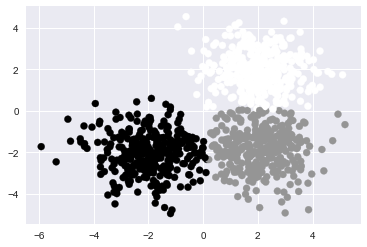

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


In [4]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))

Not bad at all.

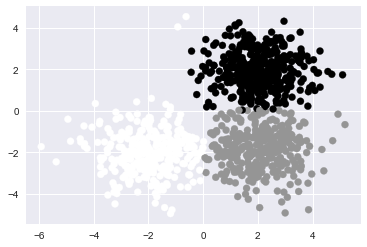

Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        2   10  350
1      310    9    1
2        6  305    7


In [5]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [6]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 133


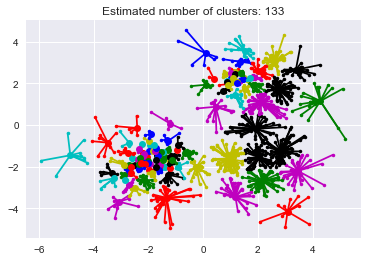

In [7]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()

# DRILL: Mo' blobs, mo' problems?

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configurations, then run the four methods ($k$-means, mean shift, spectral clustering and affinity propagation) on each one.  Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups. 

<h3> Set up Cluster Blobs </h3>

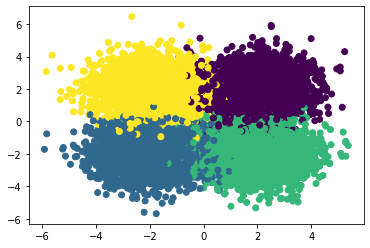

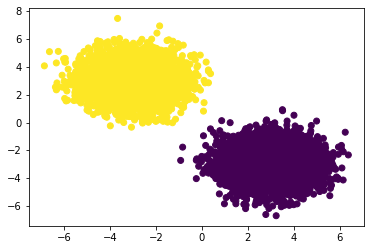

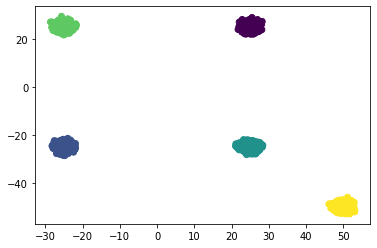

In [25]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers  = [[2, 2], [-2, -2], [2, -2], [-2,  2]]
centers1 = [[3,-3],[-3,3]]
centers2 = [[25, 25],[-25,-25],[25,-25],[-25, 25],[50,-50]]

cent_array = [centers,centers1,centers2]
X_train = np.zeros(shape=(3,1000,2))
X_test = np.zeros(shape=(3,9000,2))
y_train = np.zeros(shape=(3,1000))
y_test  = np.zeros(shape=(3,9000))

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
for i in range(3):
    X, y = make_blobs(
    n_samples=10000,
    centers=cent_array[i],
    cluster_std=1,
    n_features=2,
    random_state=42)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.show()

    #Divide into training and test sets.
    X_train[i][:][:], X_test[i][:][:], y_train[i][:][:], y_test[i][:][:] = train_test_split(X,y,test_size=0.9,random_state=42)

<h3> K-means </h3>

In [41]:
# Normalize the data.
X_norm = normalize(X_train[0,:])
X_pca = PCA(2).fit_transform(X_norm)

X_norm1 = normalize(X_train[1,:])
X_pca1 = PCA(2).fit_transform(X_norm1)

X_norm2 = normalize(X_train[2,:])
X_pca2 = PCA(2).fit_transform(X_norm2)


In [44]:
y_pred = KMeans(n_clusters=4, random_state=42).fit_predict(X_pca)
y_pred1 = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca1)
y_pred2 = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca2)

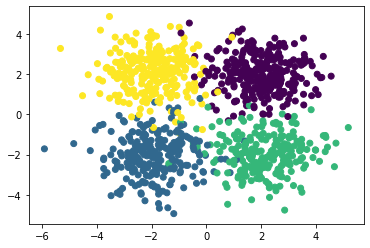

Comparing k-means clusters against the data:
col_0  0.0  1.0  2.0  3.0
row_0                    
0        7    6  226    0
1      258    0    3    2
2        0  227    9    7
3        8    6    0  241


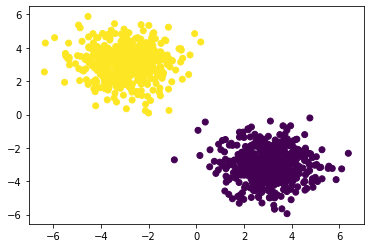

Comparing k-means clusters against the data:
col_0  0.0  1.0
row_0          
0      512    0
1        0  488


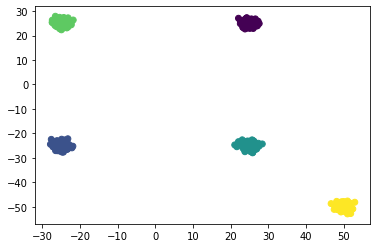

Comparing k-means clusters against the data:
col_0  0.0  1.0  2.0  3.0  4.0
row_0                         
0        0    0   83    0   68
1      221    0    0    0    0
2        0  203    0    0    0
3        0    0    0  187    0
4        0    0  108    0  130


In [45]:
# Plot the solution.
plt.scatter(X_train[0,:, 0], X_train[0,:, 1], c=y_train[0,:])
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train[0,:]))

plt.scatter(X_train[1,:, 0], X_train[1,:, 1], c=y_train[1,:])
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred1, y_train[1,:]))

plt.scatter(X_train[2,:, 0], X_train[2,:, 1], c=y_train[2,:])
plt.show()

print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred2, y_train[2,:]))

<h3> Mean Shifting </h3>

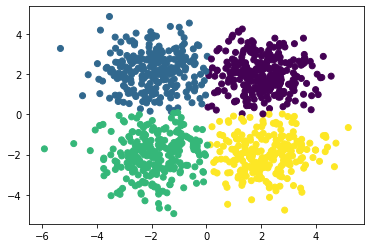

Number of estimated clusters Blob1: 4
Comparing the assigned categories to the ones in the data for Blob 1:
col_0    0    1    2    3
row_0                    
0.0    260    8    0    5
1.0      0    5  228    6
2.0      3    0    9  226
3.0      2  240    8    0


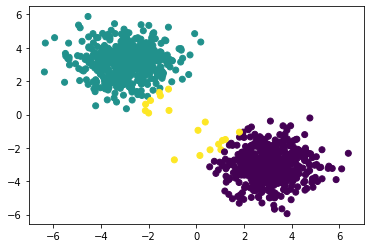

Number of estimated clusters Blob2: 3
Comparing the assigned categories to the ones in the data for Blob 2:
col_0    0    1   2
row_0              
0.0    502    0  10
1.0      0  480   8


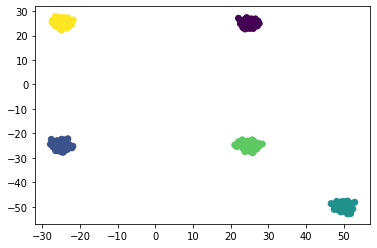

Number of estimated clusters Blob3: 5
Comparing the assigned categories to the ones in the data for Blob 3:
col_0    0    1    2    3    4
row_0                         
0.0    221    0    0    0    0
1.0      0  203    0    0    0
2.0      0    0    0  191    0
3.0      0    0    0    0  187
4.0      0    0  198    0    0


In [50]:
from sklearn.cluster import MeanShift, estimate_bandwidth

# number based on an inspection of the distances among points in the data.
bandwidth  = estimate_bandwidth(X_train[0,:], quantile=0.2, n_samples=500)
bandwidth1 = estimate_bandwidth(X_train[1,:], quantile=0.2, n_samples=500)
bandwidth2 = estimate_bandwidth(X_train[2,:], quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train[0,:])
ms1 = MeanShift(bandwidth=bandwidth1, bin_seeding=True)
ms1.fit(X_train[1,:])
ms2 = MeanShift(bandwidth=bandwidth2, bin_seeding=True)
ms2.fit(X_train[2,:])

# Extract cluster assignments for each data point.
labels = ms.labels_
labels1 = ms1.labels_
labels2 = ms2.labels_
# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_
cluster_centers1 = ms1.cluster_centers_
cluster_centers2 = ms2.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))
n_clusters1_ = len(np.unique(labels1))
n_clusters2_ = len(np.unique(labels2))


plt.scatter(X_train[0,:, 0], X_train[0,:, 1], c=labels)
plt.show()
print("Number of estimated clusters Blob1: {}".format(n_clusters_))
print('Comparing the assigned categories to the ones in the data for Blob 1:')
print(pd.crosstab(y_train[0,:],labels))

plt.scatter(X_train[1,:, 0], X_train[1,:, 1], c=labels1)
plt.show()
print("Number of estimated clusters Blob2: {}".format(n_clusters1_))
print('Comparing the assigned categories to the ones in the data for Blob 2:')
print(pd.crosstab(y_train[1,:],labels1))

plt.scatter(X_train[2,:, 0], X_train[2,:, 1], c=labels2)
plt.show()
print("Number of estimated clusters Blob3: {}".format(n_clusters2_))
print('Comparing the assigned categories to the ones in the data for Blob 3:')
print(pd.crosstab(y_train[2,:],labels2))


<h3> Spectral Clustering </h3>

C:\Users\Clyde\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
C:\Users\Clyde\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:235: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


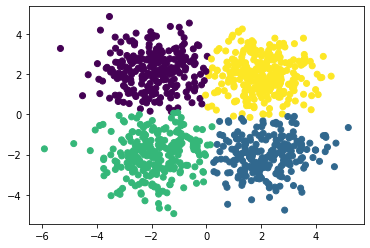

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3
row_0                    
0.0      8    2    0  263
1.0      5    6  228    0
2.0      0  222   11    5
3.0    239    0    8    3


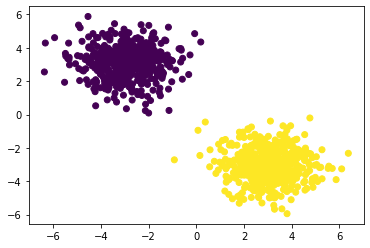

Comparing the assigned categories to the ones in the data:
col_0    0    1
row_0          
0.0      0  512
1.0    488    0


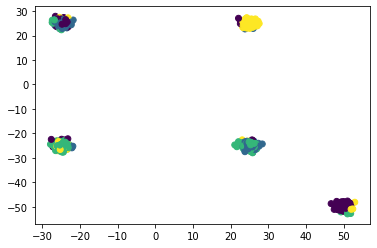

Comparing the assigned categories to the ones in the data:
col_0    0    1    2    3    4
row_0                         
0.0      0    0  221    0    0
1.0      0    0    0  203    0
2.0      0    0    0    0  191
3.0    187    0    0    0    0
4.0      0  198    0    0    0


In [57]:
n_clusters,n_clusters1,n_clusters2 = 4,2,5

sc = SpectralClustering(n_clusters=n_clusters)
sc1 = SpectralClustering(n_clusters=n_clusters1)
sc2 = SpectralClustering(n_clusters=n_clusters2)

sc.fit(X_train[0,:])
sc1.fit(X_train[1,:])
sc2.fit(X_train[2,:])

#Predicted clusters.
predict  =sc.fit_predict(X_train[0,:])
predict1 =sc1.fit_predict(X_train[1,:])
predict2 =sc2.fit_predict(X_train[2,:])

#Graph results.
plt.scatter(X_train[0,:, 0], X_train[0,:, 1], c=predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train[0,:],predict))

plt.scatter(X_train[1,:, 0], X_train[1,:, 1], c=predict1)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train[1,:],predict1))

plt.scatter(X_train[2,:, 0], X_train[2,:, 1], c=predict)
plt.show()
print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train[2,:],predict2))

In [58]:
np.shape(X_train)

(3, 1000, 2)

In [61]:
X_train[0,:].shape

(1000, 2)

Done
Estimated number of clusters: 27


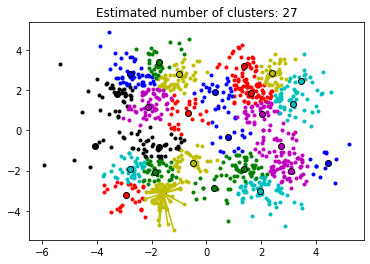

Done
Estimated number of clusters: 80


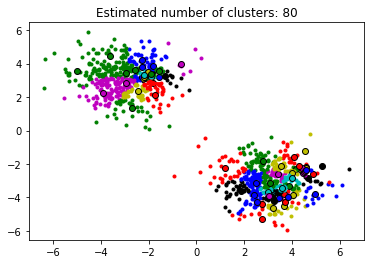

Done
Estimated number of clusters: 1000


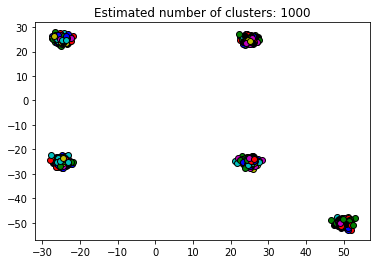

In [65]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from itertools import cycle

for i in range(3):
    af = AffinityPropagation().fit(X_train[i,:])
    X = X_train[i,:]
    print('Done')
    # Pull the number of clusters and cluster assignments for each data point.
    cluster_centers_indices = af.cluster_centers_indices_
    n_clusters_ = len(cluster_centers_indices)
    labels = af.labels_
    print('Estimated number of clusters: {}'.format(n_clusters_))
    plt.figure(1)
    plt.clf()
    colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
    for k, col in zip(range(n_clusters_), colors):
        class_members = labels == k
        cluster_center = X[cluster_centers_indices[k]]
        plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
        plt.plot(cluster_center[0],
                 cluster_center[1],
                 'o',
                 markerfacecolor=col,
                 markeredgecolor='k')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
    plt.title('Estimated number of clusters: {}'.format(n_clusters_))
    plt.show()